# Question 5

### Import dependencies

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

/tmp/ipykernel_5294/187724789.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


In [2]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

### Import data

In [6]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds_2016 = ds.sel(time=slice('2002-01-01', '2016-07-01'))
ds_2012 = ds.sel(time=slice('2002-01-01', '2012-12-31'))

### Group by day

In [8]:
# calculate the daily cycle using groupby
daily_2016 = ds_2016.groupby(ds_2016["time.dayofyear"]).mean()
daily_2012 = ds_2012.groupby(ds_2012["time.dayofyear"]).mean()
daily_2012

<xarray.Dataset>
Dimensions:           (dayofyear: 366, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * dayofyear         (dayofyear) int64 1 2 3 4 5 6 ... 361 362 363 364 365 366
Data variables:
    analysed_sst      (dayofyear, lat, lon) float32 290.1 290.0 ... nan nan
    analysis_error    (dayofyear, lat, lon) float32 0.381 0.382 ... nan nan
    mask              (dayofyear, lat, lon) float32 1.0 1.0 1.0 ... 2.0 2.0 2.0
    sea_ice_fraction  (dayofyear, lat, lon) float32 nan nan nan ... nan nan nan
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

### 

### Calculate Anomaly

In [13]:
anomaly = ds_2016.groupby("time.dayofyear").max()['analysed_sst'] - ds_2012.groupby(ds_2012["time.dayofyear"]).mean()['analysed_sst']

(array([5.476900e+04, 3.162758e+06, 7.684144e+06, 2.693366e+06,
        3.713250e+05, 4.711700e+04, 6.932000e+03, 9.960000e+02,
        2.300000e+02, 1.890000e+02]),
 array([2.65502930e-03, 8.58715832e-01, 1.71477664e+00, 2.57083750e+00,
        3.42689824e+00, 4.28295898e+00, 5.13901997e+00, 5.99508047e+00,
        6.85114145e+00, 7.70720196e+00, 8.56326294e+00]),
 <BarContainer object of 10 artists>)

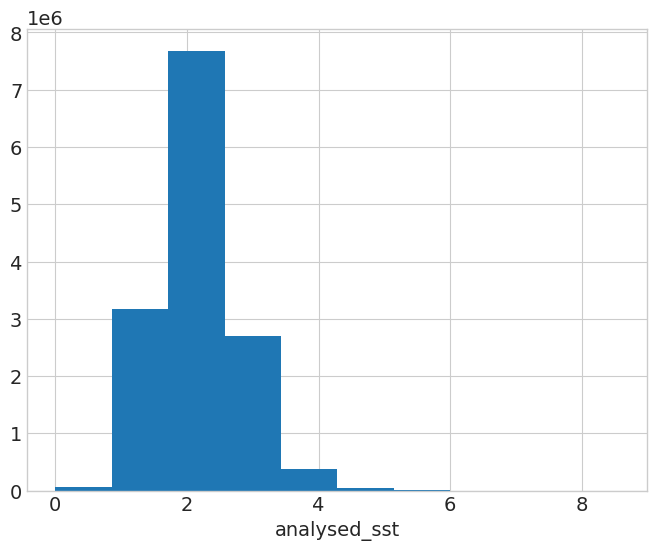

In [14]:
anomaly.plot()

In [6]:
# check that the dates are correct for each df I'm calling
# (Facu said the first part has everything, second part has the subset)

<xarray.DataArray 'analysed_sst' ()>
array(10.530853, dtype=float32)

### Pick the month with the maximum sst anomaly for each location

In [9]:
# for each location
# keep the month where the anomaly is the max
# plot the month column
#anomaly = anomaly.dropna(dim="dayofyear")
max_anomaly = anomaly.argmax(dim="dayofyear", skipna=True)
max_anomaly

ValueError: 'dayofyear' not found in array dimensions ()

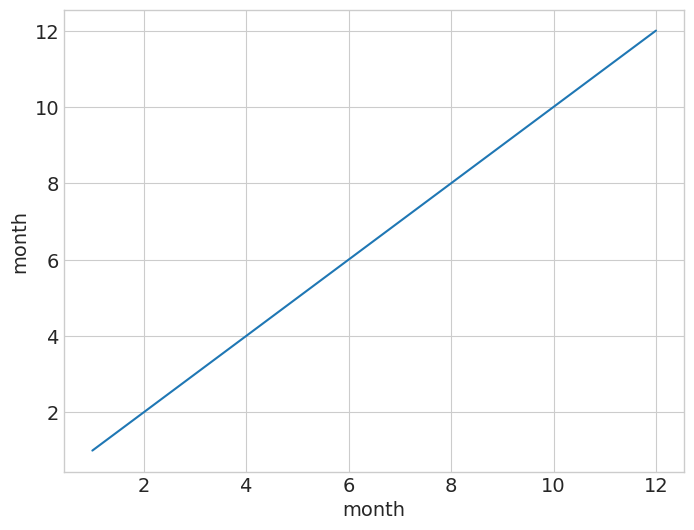

In [6]:
max_anomaly["analysed_sst"].plot()

In [10]:
# # calculate the annual cycle using groupby
# monthly = anomaly.groupby(anomaly["time.month"]).max()
# monthly.head()
# location_anomaly = anomaly.groupby(["lat", "lon"]).max()
# location_anomaly

TypeError: `group` must be an xarray.DataArray or the name of an xarray variable or dimension. Received ['lat', 'lon'] instead.

### Plot Sea Surface Temperature

In [17]:
anomaly["month"].sel.plot()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()